In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from matplotlib.patches import Circle
from scipy.special import gamma
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad, nquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
from  scipy.interpolate import interp1d
from scipy.misc import derivative
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import glob
from unsio import *
import os
import wkbl
from wkbl.astro.halo_info import *
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rc
import datetime
from scipy.misc import derivative
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [13]:
%%latex
whent defining the virial radius of a halo it has to be in terms of the critical density of the universe
\begin{equation}
\rho_{crit = \frac{3H(z)^2}{8\pi G}}
\end{equation}

times the virial overdensity $\Delta_{crit} = 18*\pi^2 + 82x - 39x^2$  where $x = \frac{\Omega_m}{\Omega_m + a^3\Omega_{\lambda}}-1$


<IPython.core.display.Latex object>

In [33]:
def Delta_crit(a, omg_m, omg_l):
    x = (omg_m/(omg_m+(a**3)*omg_l))-1
    return (18.*np.pi**2) + (82.*x) - (39.* x**2)
get_Delta_crit = np.vectorize(Delta_crit)

def a_dot(a,h0,omg_m, omg_l):
    omg_k = 1- omg_m - omg_l
    return h0 * a * np.sqrt((omg_m*a**(-3))+(omg_k*a**(-2))+omg_l)

def rho_crit(a, h0, omg_m, omg_l, G):
    H_z = a_dot(a,h0,omg_m, omg_l) / a
    return 3. * H_z**2 /8. / np.pi / G/ 3.08567758e19**2

get_rho_crit = np.vectorize(get_rho_crit)

In [34]:
G = 4.53957577032e-39 #kpc^3 Msun^-1 s^-2
H0          =  0.677399978637695E+02
omg_m     =  0.308
omg_l     =  0.6911



In [35]:
get_rho_crit(0.5,H0,omg_m,omg_l,G)

array(400.27989143)

<IPython.core.display.Javascript object>


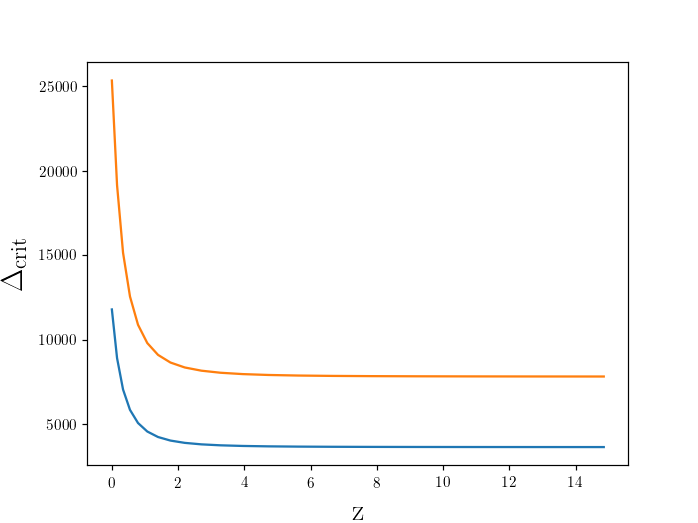

In [44]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$\rm z$",fontsize=20)
ax.set_ylabel(r"$\rm \Delta_{crit}$",fontsize=20)
ax.set_yscale('log' )

a = np.logspace(-1.2,0,20)
#ax.plot((1./a)-1,Delta_crit(a,omg_m,omg_l),label=r"$\rm \Delta_{crit}$")
#ax.plot((1./a)-1,get_rho_crit(a,H0,omg_m,omg_l,G),label=r"$\rm \rho_{crit}$")
ax.plot((1./a)-1,93*a**3*get_rho_crit(a,H0,omg_m,omg_l,G),label=r"$\rm \rho_{crit}$")
ax.plot((1./a)-1,200*a**3*get_rho_crit(a,H0,omg_m,omg_l,G),label=r"$\rm \rho_{crit}$")
#ax.plot((1./a)-1,Delta_crit(a,omg_m,omg_l)*get_rho_crit(a,H0,omg_m,omg_l,G),label=r"$\rm \rho_{crit}$")

